In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from IPython.display import IFrame
from google.colab.output import eval_js
from IPython.display import HTML

In [177]:
data = pd.read_csv("data.csv") #reading data set
# droping unnesseary data
data = data.drop("Unnamed: 0",axis=1)
data = data.drop("IUCR",axis=1)
data = data.drop("X Coordinate",axis=1)
data = data.drop("Y Coordinate",axis=1)
data = data.drop("Beat",axis=1)
data = data.drop("Ward",axis=1)
data = data.drop("Updated On",axis=1)
data = data.drop("Location",axis=1)

In [178]:
data.head()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,FBI Code,Year,Latitude,Longitude
0,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,3.0,69.0,01A,2008.0,41.758276,-87.622451
1,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,15.0,25.0,01A,2008.0,41.870252,-87.746069
2,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,8.0,66.0,01A,2008.0,41.770990,-87.698901
3,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,False,15.0,25.0,01A,2008.0,41.894917,-87.757358
4,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,True,10.0,30.0,01A,2008.0,41.843826,-87.709893


In [179]:
data = data.dropna(axis=0) #if any null value drop row

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10631 entries, 0 to 24865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10631 non-null  int64  
 1   Case Number           10631 non-null  object 
 2   Date                  10631 non-null  object 
 3   Block                 10631 non-null  object 
 4   Primary Type          10631 non-null  object 
 5   Description           10631 non-null  object 
 6   Location Description  10631 non-null  object 
 7   Arrest                10631 non-null  bool   
 8   Domestic              10631 non-null  bool   
 9   District              10631 non-null  float64
 10  Community Area        10631 non-null  float64
 11  FBI Code              10631 non-null  object 
 12  Year                  10631 non-null  float64
 13  Latitude              10631 non-null  float64
 14  Longitude             10631 non-null  float64
dtypes: bool(2), float64

In [181]:
data.nunique()

ID                      10631
Case Number             10617
Date                     5468
Block                    7135
Primary Type               26
Description               186
Location Description       94
Arrest                      2
Domestic                    2
District                   22
Community Area             77
FBI Code                   24
Year                        4
Latitude                 9456
Longitude                9455
dtype: int64

In [183]:
class Node:
    def __init__(self, ID, Case_Number, Date, Block, Primary_Type, Description, Location_Description, Arrest, Domestic, District, Community_Area, FBI_Code, Year, Lat, Long):
        self.ID = ID
        self.Case_Number = Case_Number
        self.Date = Date
        self.Block = Block
        self.Primary_Type = Primary_Type
        self.Description = Description
        self.Location_Description = Location_Description
        self.Arrest = Arrest
        self.Domestic = Domestic
        self.District = District
        self.Community_Area = Community_Area
        self.FBI_Code = FBI_Code
        self.Year = Year
        self.Lat = Lat
        self.Long = Long
        self.next = None



In [119]:
class LinkedList:
    def __init__(self):
        self.head = None

    def append(self, ID, Case_Number, Date, Block, Primary_Type, Description, Location_Description, Arrest, Domestic, District, Community_Area, FBI_Code, Year, Lat, Long):
        new_node = Node(ID, Case_Number, Date, Block, Primary_Type, Description, Location_Description, Arrest, Domestic, District, Community_Area, FBI_Code, Year, Lat, Long)
        if not self.head:
            self.head = new_node
            return
        last_node = self.head
        while last_node.next:
            last_node = last_node.next
        last_node.next = new_node

    def display(self):
      current = self.head
      while current:
          print(
              f"ID: {current.ID}, Case Number: {current.Case_Number}, Date: {current.Date}, "
              f"Block: {current.Block}, Primary Type: {current.Primary_Type}, Description: {current.Description}, "
              f"Location Description: {current.Location_Description}, Arrest: {current.Arrest}, "
              f"Domestic: {current.Domestic}, District: {current.District}, "
              f"Community Area: {current.Community_Area}, FBI Code: {current.FBI_Code}, "
              f"Year: {current.Year}, Latitude: {current.Lat}, Longitude: {current.Long}"
          )
          current = current.next


    # creating a hash table wrt id to search any data
    def to_hash_table(self):
        hash_table = {}
        current = self.head
        while current:
            data = {
                'ID': current.ID,
                'Case_Number': current.Case_Number,
                'Date': current.Date,
                'Block': current.Block,
                'Primary_Type': current.Primary_Type,
                'Description': current.Description,
                'Location_Description': current.Location_Description,
                'Arrest': current.Arrest,
                'Domestic': current.Domestic,
                'District': current.District,
                'Community_Area': current.Community_Area,
                'FBI_Code': current.FBI_Code,
                'Year': current.Year,
                'Latitude': current.Lat,
                'Longitude': current.Long
            }
            hash_table[current.ID] = data
            current = current.next
        return hash_table

    def search_by_id(self, target_id):
        current = self.head
        while current:
            if current.ID == target_id:
                return {
                    'ID': current.ID,
                    'Case_Number': current.Case_Number,
                    'Date': current.Date,
                    'Block': current.Block,
                    'Primary_Type': current.Primary_Type,
                    'Description': current.Description,
                    'Location_Description': current.Location_Description,
                    'Arrest': current.Arrest,
                    'Domestic': current.Domestic,
                    'District': current.District,
                    'Community_Area': current.Community_Area,
                    'FBI_Code': current.FBI_Code,
                    'Year': current.Year,
                    'Latitude': current.Lat,
                    'Longitude': current.Long
                }
            current = current.next
        return None


In [120]:
linked_list = LinkedList()

In [121]:
for index, row in data.iterrows():
    linked_list.append(
        row['ID'], row['Case Number'], row['Date'], row['Block'], row['Primary Type'],
        row['Description'], row['Location Description'], row['Arrest'], row['Domestic'],
        row['District'], row['Community Area'], row['FBI Code'], row['Year'], row['Latitude'], row['Longitude']
    )

In [151]:
linked_list.display()

Streaming output truncated to the last 5000 lines.
ID: 5999489, Case Number: HP107201, Date: 01/05/2008 12:00:00 AM, Block: 020XX W AUGUSTA BLVD, Primary Type: BURGLARY, Description: FORCIBLE ENTRY, Location Description: RESIDENCE, Arrest: False, Domestic: False, District: 12.0, Community Area: 24.0, FBI Code: 05, Year: 2008.0, Latitude: 41.899536033, Longitude: -87.678114931
ID: 5999493, Case Number: HP102798, Date: 01/02/2008 02:10:00 PM, Block: 062XX S PAULINA ST, Primary Type: ROBBERY, Description: STRONGARM - NO WEAPON, Location Description: SIDEWALK, Arrest: False, Domestic: False, District: 7.0, Community Area: 67.0, FBI Code: 03, Year: 2008.0, Latitude: 41.780799978, Longitude: -87.666675944
ID: 5999494, Case Number: HP103571, Date: 01/03/2008 06:33:29 AM, Block: 049XX W VAN BUREN ST, Primary Type: BATTERY, Description: DOMESTIC BATTERY SIMPLE, Location Description: RESIDENCE, Arrest: False, Domestic: True, District: 15.0, Community Area: 25.0, FBI Code: 08B, Year: 2008.0, Lati

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [152]:
class AVLNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.height = 1

In [153]:
class AVLTree:
    def __init__(self):
        self.root = None

    def insert(self, key, value):
        self.root = self._insert(self.root, key, value)

    def _insert(self, node, key, value):
        if not node:
            return AVLNode(key, value)

        if key < node.key:
            node.left = self._insert(node.left, key, value)
        elif key > node.key:
            node.right = self._insert(node.right, key, value)
        else:
            node.value += 1
            return node

        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))

        balance = self._get_balance(node)

        # Left Left Case
        if balance > 1 and key < node.left.key:
            return self._right_rotate(node)

        # Right Right Case
        if balance < -1 and key > node.right.key:
            return self._left_rotate(node)

        # Left Right Case
        if balance > 1 and key > node.left.key:
            node.left = self._left_rotate(node.left)
            return self._right_rotate(node)

        # Right Left Case
        if balance < -1 and key < node.right.key:
            node.right = self._right_rotate(node.right)
            return self._left_rotate(node)

        return node

    def _get_height(self, node):
        if not node:
            return 0
        return node.height

    def _get_balance(self, node):
        if not node:
            return 0
        return self._get_height(node.left) - self._get_height(node.right)

    def _left_rotate(self, z):
        y = z.right
        T2 = y.left

        y.left = z
        z.right = T2

        z.height = 1 + max(self._get_height(z.left), self._get_height(z.right))
        y.height = 1 + max(self._get_height(y.left), self._get_height(y.right))

        return y

    def _right_rotate(self, y):
        x = y.left
        T2 = x.right

        x.right = y
        y.left = T2

        y.height = 1 + max(self._get_height(y.left), self._get_height(y.right))
        x.height = 1 + max(self._get_height(x.left), self._get_height(x.right))

        return x

    def count_primary_types(self):
        result = {}
        self._count_primary_types(self.root, result)
        return result

    def _count_primary_types(self, node, result):
        if node:
            self._count_primary_types(node.left, result)
            result[node.key] = node.value
            self._count_primary_types(node.right, result)

In [154]:
crime_types = AVLTree()

In [155]:
current = linked_list.head
while current:
    crime_types.insert(current.Primary_Type, 1)
    current = current.next

In [156]:
crimes_count = crime_types.count_primary_types()

In [157]:
for primary_type, count in crimes_count.items():
    print(f"Primary Type: {primary_type}, Count: {count}")

Primary Type: ARSON, Count: 20
Primary Type: ASSAULT, Count: 664
Primary Type: BATTERY, Count: 2070
Primary Type: BURGLARY, Count: 651
Primary Type: CRIM SEXUAL ASSAULT, Count: 25
Primary Type: CRIMINAL DAMAGE, Count: 1257
Primary Type: CRIMINAL TRESPASS, Count: 314
Primary Type: DECEPTIVE PRACTICE, Count: 188
Primary Type: GAMBLING, Count: 6
Primary Type: HOMICIDE, Count: 336
Primary Type: INTERFERENCE WITH PUBLIC OFFICER, Count: 9
Primary Type: INTIMIDATION, Count: 5
Primary Type: KIDNAPPING, Count: 8
Primary Type: LIQUOR LAW VIOLATION, Count: 10
Primary Type: MOTOR VEHICLE THEFT, Count: 420
Primary Type: NARCOTICS, Count: 963
Primary Type: OBSCENITY, Count: 1
Primary Type: OFFENSE INVOLVING CHILDREN, Count: 45
Primary Type: OTHER OFFENSE, Count: 682
Primary Type: PROSTITUTION, Count: 92
Primary Type: PUBLIC PEACE VIOLATION, Count: 56
Primary Type: ROBBERY, Count: 454
Primary Type: SEX OFFENSE, Count: 24
Primary Type: STALKING, Count: 5
Primary Type: THEFT, Count: 2232
Primary Type: 

In [158]:
primary_types = list(crimes_count.keys())
counts = list(crimes_count.values())

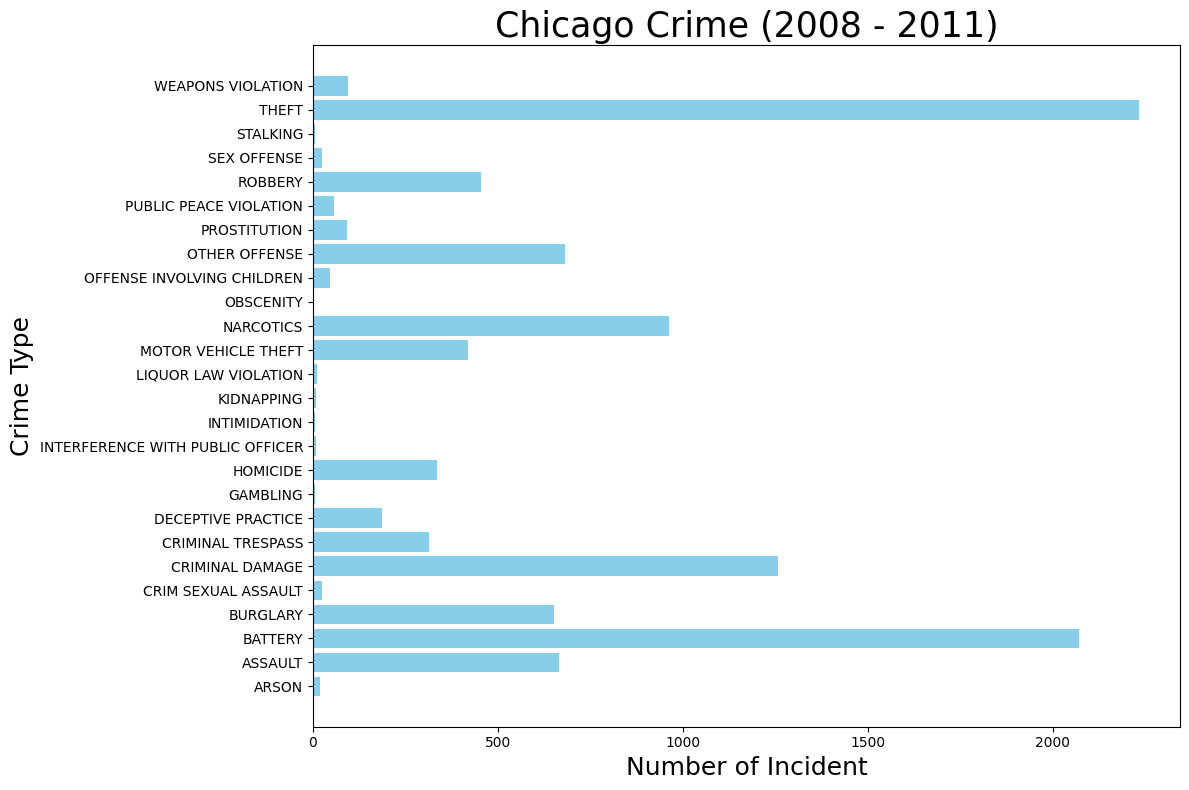

In [159]:
plt.figure(figsize=(12, 8))
plt.barh(primary_types, counts, color='skyblue')
plt.xlabel('Number of Incident',fontsize=18)
plt.ylabel('Crime Type',fontsize=18)
plt.title('Chicago Crime (2008 - 2011)',fontsize=25)
plt.tight_layout()

plt.show()

In [160]:
year = AVLTree()

In [161]:
current = linked_list.head
while current:
    year.insert(current.Year, 1)
    current = current.next

In [162]:
year_count = year.count_primary_types()

In [163]:
for primary_type, count in year_count.items():
    print(f"Primary Type: {primary_type}, Count: {count}")

Primary Type: 2008.0, Count: 9843
Primary Type: 2009.0, Count: 413
Primary Type: 2010.0, Count: 177
Primary Type: 2011.0, Count: 198


In [164]:
year_types = list(year_count.keys())
counts = list(year_count.values())

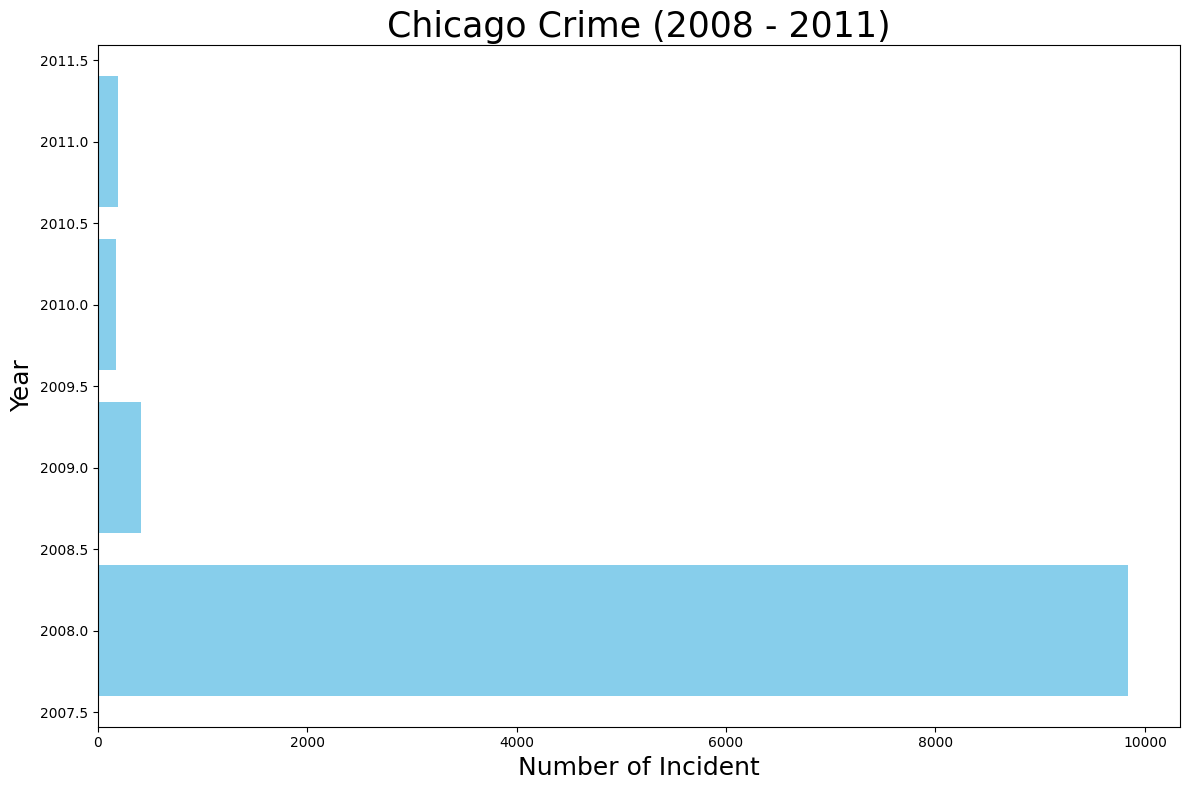

In [165]:
plt.figure(figsize=(12, 8))
plt.barh(year_types, counts, color='skyblue')
plt.xlabel('Number of Incident',fontsize=18)
plt.ylabel('Year',fontsize=18)
plt.title('Chicago Crime (2008 - 2011)',fontsize=25)
plt.tight_layout()

plt.show()

In [123]:
data_2008 = data[data['Year']==2008.0]
data_2009 = data[data['Year']==2009.0]
data_2010 = data[data['Year']==2010.0]
data_2011 = data[data['Year']==2011.0]


In [124]:
list2008 = LinkedList()
list2009 = LinkedList()
list2010 = LinkedList()
list2011 = LinkedList()


In [125]:
for index, row in data_2008.iterrows():
    list2008.append(
        row['ID'], row['Case Number'], row['Date'], row['Block'], row['Primary Type'],
        row['Description'], row['Location Description'], row['Arrest'], row['Domestic'],
        row['District'], row['Community Area'], row['FBI Code'], row['Year'], row['Latitude'], row['Longitude']
    )

In [126]:
for index, row in data_2009.iterrows():
    list2009.append(
        row['ID'], row['Case Number'], row['Date'], row['Block'], row['Primary Type'],
        row['Description'], row['Location Description'], row['Arrest'], row['Domestic'],
        row['District'], row['Community Area'], row['FBI Code'], row['Year'], row['Latitude'], row['Longitude']
    )

In [127]:
for index, row in data_2010.iterrows():
    list2010.append(
        row['ID'], row['Case Number'], row['Date'], row['Block'], row['Primary Type'],
        row['Description'], row['Location Description'], row['Arrest'], row['Domestic'],
        row['District'], row['Community Area'], row['FBI Code'], row['Year'], row['Latitude'], row['Longitude']
    )

In [128]:
for index, row in data_2011.iterrows():
    list2011.append(
        row['ID'], row['Case Number'], row['Date'], row['Block'], row['Primary Type'],
        row['Description'], row['Location Description'], row['Arrest'], row['Domestic'],
        row['District'], row['Community Area'], row['FBI Code'], row['Year'], row['Latitude'], row['Longitude']
    )

In [129]:
arrested_counts = []
not_arrested_counts = []

In [130]:
arrest_count_2008 = {'Arrested': 0, 'Not Arrested': 0}

current = list2008.head
while current:
    if current.Arrest:
        arrest_count_2008['Arrested'] += 1
    else:
        arrest_count_2008['Not Arrested'] += 1
    current = current.next

arrested_counts.append(arrest_count_2008['Arrested'])
not_arrested_counts.append(arrest_count_2008['Not Arrested'])

In [131]:
arrest_count_2009 = {'Arrested': 0, 'Not Arrested': 0}

current = list2009.head
while current:
    if current.Arrest:
        arrest_count_2009['Arrested'] += 1
    else:
        arrest_count_2009['Not Arrested'] += 1
    current = current.next

arrested_counts.append(arrest_count_2009['Arrested'])
not_arrested_counts.append(arrest_count_2009['Not Arrested'])

In [132]:
arrest_count_2010 = {'Arrested': 0, 'Not Arrested': 0}

current = list2010.head
while current:
    if current.Arrest:
        arrest_count_2010['Arrested'] += 1
    else:
        arrest_count_2010['Not Arrested'] += 1
    current = current.next

arrested_counts.append(arrest_count_2010['Arrested'])
not_arrested_counts.append(arrest_count_2010['Not Arrested'])

In [133]:
arrest_count_2011 = {'Arrested': 0, 'Not Arrested': 0}

current = list2011.head
while current:
    if current.Arrest:
        arrest_count_2011['Arrested'] += 1
    else:
        arrest_count_2011['Not Arrested'] += 1
    current = current.next


arrested_counts.append(arrest_count_2011['Arrested'])
not_arrested_counts.append(arrest_count_2011['Not Arrested'])

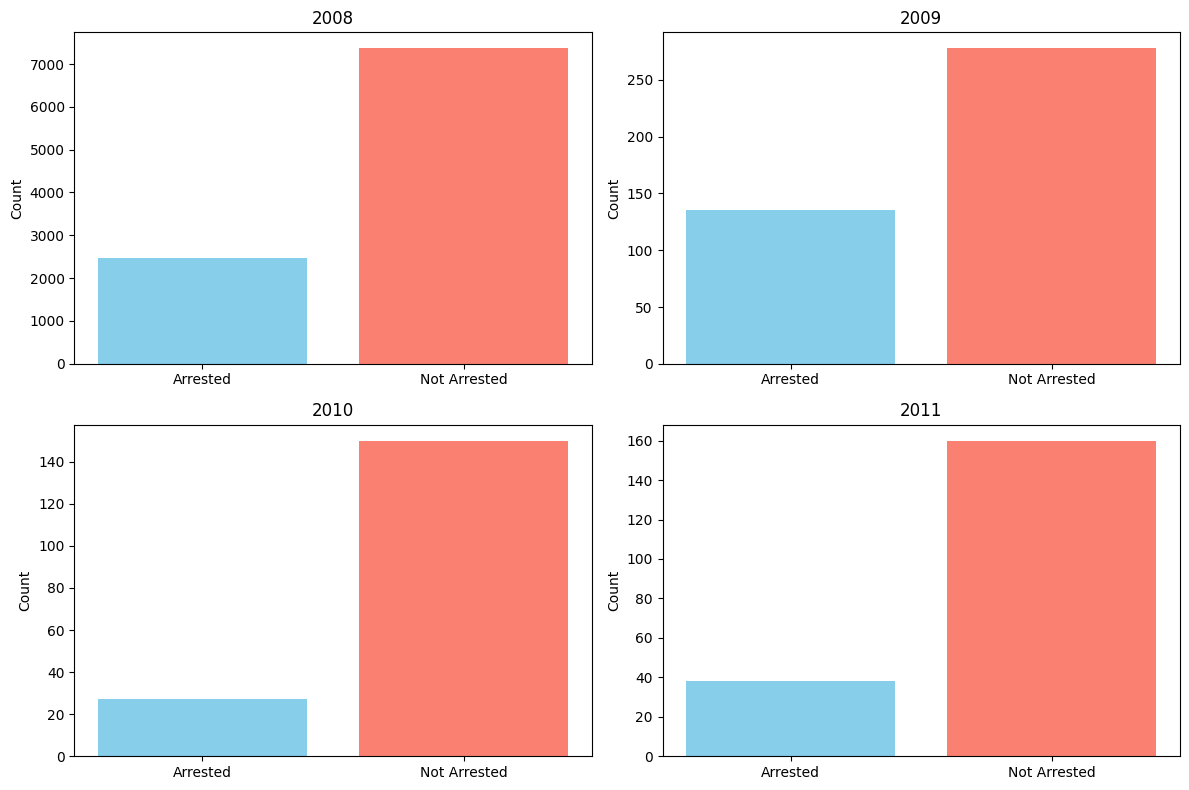

In [134]:
labels = ['2008', '2009', '2010', '2011']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i in range(4):
    axs[i].bar(['Arrested', 'Not Arrested'], [arrested_counts[i], not_arrested_counts[i]], color=['skyblue', 'salmon'])
    axs[i].set_title(labels[i])
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [166]:
hash_table = linked_list.to_hash_table()

In [167]:
found_data = linked_list.search_by_id(4788)

In [168]:
found_data

{'ID': 4788,
 'Case_Number': 'HP618616',
 'Date': '10/10/2008 02:33:00 AM',
 'Block': '052XX W CHICAGO AVE',
 'Primary_Type': 'HOMICIDE',
 'Description': 'FIRST DEGREE MURDER',
 'Location_Description': 'RESTAURANT',
 'Arrest': False,
 'Domestic': False,
 'District': 15.0,
 'Community_Area': 25.0,
 'FBI_Code': '01A',
 'Year': 2008.0,
 'Latitude': 41.894916924,
 'Longitude': -87.757358147}